### Unidad I. Variables, distribuciones y pruebas de hipótesis. 

## Análisis descriptivo de datos. 

- [Características numéricas de las variables aleatorias.](#Estadísticos-de-resumen)
- [Concepto de muestra](#Muestra-estadística)
- [Estimación estadística de los parámetros de una distribución a partir de los datos de una muestra](#Ajuste-de-distribuciones-estadísticas)

La [estadística descriptiva](https://en.wikipedia.org/wiki/Descriptive_statistics) tiene más que ver con describir una muestra de manera cualitativa (gráfica) o cuantitativa (numérica) que con inferir propiedades acerca de la población de la cual proviene esa muestra ([estadística inferencial](https://en.wikipedia.org/wiki/Statistical_inference)).  

La estadística descriptiva está fuertemente ligada al [análisis exploratorio de datos](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (*EDA* for *Exploratory Data Analysis*) y al [análisis inicial de datos](https://en.wikipedia.org/wiki/Data_analysis#Initial_data_analysis) (*IDA* por *Initial Data Analysis*). El primero focaliza en explorar los datos en busca de nuevas hipótesis, las cuales pueden terminar en nuevos muestreos y experimentos, mientras el segundo se focaliza en asegurar la calidad de los datos, chequear las asunciones y realizar las transformaciones necesarias para testear la hipótesis que teníamos en mente a la hora de recolectar los datos.

El análisis inicial de datos no es necesario solamente para el testeo de hipótesis de la estadística inferencial, sino también como un paso previo para el [aprendizaje automático](https://en.wikipedia.org/wiki/Machine_learning) (*ML* por *Machine Learning*) y forma parte importante de las primeras fases de la [minería de datos](https://en.wikipedia.org/wiki/Data_mining) (*Data mining*).

### Muestra estadística

Se denomina <a href="https://en.wikipedia.org/wiki/Sample_(statistics)">muestra</a> a un subconjunto de datos tomados o seleccionados de una [población estadística](https://en.wikipedia.org/wiki/Statistical_population) mediante un <a href="https://en.wikipedia.org/wiki/Sampling_(statistics)">proceso de muestreo</a> determinado. Cada una de las [unidades muestrales](https://en.wikipedia.org/wiki/Statistical_unit) suele llamarse observación, y es posible medir variables aleatorias para cada una de ellas.

Las **muestras** pueden ser:  
- **Completas**: Incluye a todos los casos, individuos u objetos de la población que cumplen con un criterio (de selección) determinado. Generalmente es difícil o imposible disponer de muestras completas.  
- **Representativas** (*representative or unbiased*): Un conjunto de unidades muestrales seleccionados de una muestra completa usando un proceso de selección/muestreo que no depende de las propiedades de estas unidades. Una manera de obtener muestras no sesgadas es seleccionando una **muestra aleatoria** (*random/probability sample*).  

#### Técnicas de muestreo

##### Muestreo aleatorio simple

En el [muestreo aleatorio simple](https://en.wikipedia.org/wiki/Simple_random_sample) se selecciona un número k de unidades muestrales de manera aleatoria, teniendo cada elemento de la población la misma probabilidad de ser seleccionado. El muestreo puede ser **con o sin reposición** (*with or without replacement*). Si el muestreo se efectúa con reposición, cada elemento de la población puede ser seleccionado más de una vez. En el muestreo aleatorio sin reposición, donde los elementos no son devueltos a la población y no pueden ser elegidos más de una vez, la probabilidad de sacar un determinado elemento cambia con la extracción del anterior (no son independientes). Sin embargo el muestreo aleatorio simple sin reposición satisface [intercambiabilidad](https://en.wikipedia.org/wiki/Exchangeable_random_variables), es que cualquier orden de los elementos extraídos es igualmente probable. Si el tamaño de la población es mucho más grande que el tamaño de la muestra, el muestreo aleatorio simple sin reposición se aproxima a un muestreo simple con reposición, dada la baja probabilidad de elegir un mismo elemento dos veces.

La manera más sencilla de hacer un muestreo aleatorio simple con o sin reposición en **Julia**, es usando la función `sample` de **StatsBase**. Ésta es similar a la función `sample` de **R**. Ambas toman una lista de valores, el tamaño de la muestra a tomar (`size`) y se les debe indicar si queremos que sea con o sin reemplazo (`replace`). Una diferencia entre ambas funciones es que mientras R por defecto hace el muestreo sin reemplazo, Julia lo hace con reemplazo si no le indicamos lo contrario.

In [1]:
individuos = 1:10

1:10

In [2]:
using StatsBase

sample(individuos, 5, replace=true)

5-element Array{Int64,1}:
 8
 2
 9
 8
 7

In [3]:
using RCall

R"sample($individuos, size=5, replace=TRUE)"

RCall.RObject{RCall.IntSxp}
[1] 3 9 5 1 7


##### Muestreo sistemático

El [muestreo sistemático](https://en.wikipedia.org/wiki/Systematic_sampling) consiste en ordenar los elementos de una población según alguna variable de interés, para luego tomar *n* unidades muestrales equiespaciadas. El primer elemento debe ser seleccionado al azar, quedando los otros determinados en relación a este. Una ventaja de este tipo de muestreo es que permite muestrear una variable de intereses en todo su rango. Pero debe tenerse cuidado si la variable muestra alguna característica periódica, dado que puede generarse una muestra sesgada de la población. Además debe tenerse en cuenta que no se verá la variación entre dos elementos contiguos en la lista, dado que nunca son seleccionados a la vez.

Por ejemplo, si queremos hacer un muestreo sistemático de las plantas del [conjunto de datos iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) según largo de sus pétalos:  

In [4]:
using RDatasets
iris = dataset("datasets","iris")
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [5]:
sort!(iris, cols=:PetalLength) # Ordena la variable de interés
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,4.6,3.6,1.0,0.2,setosa
2,4.3,3.0,1.1,0.1,setosa
3,5.8,4.0,1.2,0.2,setosa
4,5.0,3.2,1.2,0.2,setosa
5,4.7,3.2,1.3,0.2,setosa
6,5.4,3.9,1.3,0.4,setosa


In [6]:
N = nrow(iris) # Número de elementos en mi población

150

In [7]:
n = 7 # Número de muestras

7

In [8]:
@assert n != 0 "El tamaño de la muestra no puede ser 0"

@assert n <= N "La muestra no puede ser superior en tamaño a la población"

k = div(N,n) # Intervalo de muestreo (sampling interval or skip)

21

In [9]:
primero = sample(1:k) # Elijo al azar (con igual probabilidad) un elemento de 1 a k para comenzar 

21

In [10]:
# Selecciono los elementos restante a k pasos del primero
índices = Int[ primero + ((muestra-1) * k) for muestra in 1:n ]

7-element Array{Int64,1}:
  21
  42
  63
  84
 105
 126
 147

In [11]:
iris[índices,:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,4.9,3.6,1.4,0.1,setosa
2,4.8,3.1,1.6,0.2,setosa
3,6.0,2.2,4.0,1.0,versicolor
4,6.0,2.9,4.5,1.5,versicolor
5,6.7,3.0,5.0,1.7,versicolor
6,6.3,2.9,5.6,1.8,virginica
7,7.6,3.0,6.6,2.1,virginica


##### Muestreo estratificado

En el [muestreo estratificado](https://en.wikipedia.org/wiki/Stratified_sampling), se estratifica la población antes de tomar las muestras. En este proceso se divide a los miembros de la población en estratos, grupos o subpoblaciones homogéneas. Estos estratos deben ser mutuamente excluyentes, dado que un miembro de la población no podrá pertenecer a más de una subpoblación. Todos los miembros de la población deben pertenecer a un estrato determinado, no pueden quedar miembros sin clasificar (estratificación exhaustiva). Una vez que se estratifico la población, se realizar un muestreo aleatorio simple o sistemático  dentro de cada estrato.

Existen tres posibles estrategias:  
- **Asignación proporcional**: El número de unidades muestrales de cada estrato es proporcional al número de individuos del estrato dentro de la población. Es decir, se respeta las proporciones de los estratos en la población.  
- **Asignación óptima**: El número de muestras seleccionadas para cada estrato es proporcional a la desviación estándar de la variable de interés en cada estrato. Ésto requiere un conocimiento previo de la población.  
- **Asignación uniforme**: Se selecciona un igual número de elementos para cada estrato. Ésto permite, cuando el tamaño de los estratos varía en la población, equiparar el poder de los test utilizados en cada estratos a la hora de compararlos. El conjunto de datos *iris* fue generado en un muestreo estratificado uniforme (50 flores de cada especie), en el que cada especie conforma un estrato.  

###### Media

$$ \mu_{s} = \frac{1}{N} \sum_{h=1}^{L} N_{h} \mu_{h} $$

Por ejemplo, si consideramos que todas las filas del conjunto de datos *iris* es nuestra población:

In [12]:
μₛ = mean(iris[:PetalLength])

3.7580000000000005

In [13]:
estratos = by(iris, :Species) do df 
    DataFrame(
    μₕ = mean(df[:PetalLength]),
    Nₕ = nrow(df)
    )
end

,Species,μₕ,Nₕ
1,setosa,1.462,50
2,versicolor,4.26,50
3,virginica,5.552,50


In [14]:
N = nrow(iris)

150

In [15]:
(1/N) * sum(estratos[:μₕ] .* estratos[:Nₕ])

3.7580000000000005

### Estadísticos de resumen

Los [estadísticos de resumen](https://en.wikipedia.org/wiki/Summary_statistics) (*Summary statistics*) describen de manera cuantitativa la distribución de una muestra. Normalmente se obtiene un conjunto de estadísticos que describen cada variable aleatoria/dimensión de los datos de manera independiente (si excluimos medidas de dependencia como las correlaciones).  

Existen **estadísticos de**: 
- tendencia central (*location or central tendency*)
- dispersión (*spread or dispersion*)
- forma (*shape*):
 - asimetría (*Skewness*)
 - apuntamiento (*Kurtosis*)

Estos estadísticos pueden ser [robustos](https://en.wikipedia.org/wiki/Robust_statistics) o no, llamándose robustos a los estadísticos menos afectados por [valores atípicos](https://en.wikipedia.org/wiki/Outlier) (*outliers*). Estos estadísticos describen la muestra de una manera más robusta cuando su distribución se aleja de una distribución normal (por ejemplo, si la distribución es asimétrica). 

#### Estadísticos de tendencia central

Existen diversos [estadísticos de tendencia central](https://en.wikipedia.org/wiki/Central_tendency), siendo la [media](https://en.wikipedia.org/wiki/Arithmetic_mean) el más popular de ellos a pesar de no ser un estadístico robusto. La medidas de ubicación robusta más popular es la [mediana](https://en.wikipedia.org/wiki/Median). La <a href=https://en.wikipedia.org/wiki/Mode_(statistics)>moda</a> es el único estadístico de tendencia central para datos nominales, pero es difícil de estimar correctamente para variables continuos.

In [16]:
for (nombre, valores) in eachcol(iris)
    println(nombre)
    
    if eltype(valores) <: Real
        println("  Media   : ", mean(valores))
        println("  Mediana : ", median(valores))
        println("  Moda    : ", mode(valores))
    else
        println("  Moda    : ", mode(valores))
    end 
    
end

SepalLength
  Media   : 5.843333333333334
  Mediana : 5.8
  Moda    : 5.0
SepalWidth
  Media   : 3.0573333333333332
  Mediana : 3.0
  Moda    : 3.0
PetalLength
  Media   : 3.7580000000000005
  Mediana : 4.35
  Moda    : 1.4
PetalWidth
  Media   : 1.1993333333333331
  Mediana : 1.3
  Moda    : 0.2
Species
  Moda    : setosa


#### Estadísticos de dispersión

De los [estadísticos de dispersión](https://en.wikipedia.org/wiki/Statistical_dispersion), la [desviación estándar](https://en.wikipedia.org/wiki/Standard_deviation) es el más popular acompañando a la media. No debe confundirse con el [error estadístico o estándar](https://en.wikipedia.org/wiki/Standard_error), que en realidad habla de la dispersión de las medias muestrales, y no de la variable de interés. La desviación estándar no es un estimador robusto. Alternativas más robustas son el [rango entre cuartiles](https://en.wikipedia.org/wiki/Interquartile_range) y la [*Median Absolute Deviation*](https://en.wikipedia.org/wiki/Median_absolute_deviation) (*MAD*).

In [17]:
for (nombre, valores) in eachcol(iris)
    if eltype(valores) <: Real
        
        println(nombre)
        
        println("  Varianza                  : ", var(valores))
        println("  Desviación estándar       : ", std(valores))
        println("  Rango intercuartílico     : ", iqr(valores))
        println("  Median Absolute Deviation : ", mad(valores))
        
    end
end

SepalLength
  Varianza                  : 0.6856935123042507
  Desviación estándar       : 0.828066127977863
  Rango intercuartílico     : 1.3000000000000007
  Median Absolute Deviation : 1.0378200000000002
SepalWidth
  Varianza                  : 0.18997941834451898
  Desviación estándar       : 0.4358662849366982
  Rango intercuartílico     : 0.5
  Median Absolute Deviation : 0.44477999999999973
PetalLength
  Varianza                  : 3.116277852348993
  Desviación estándar       : 1.7652982332594662
  Rango intercuartílico     : 3.4999999999999996
  Median Absolute Deviation : 1.8532499999999998
PetalWidth
  Varianza                  : 0.5810062639821029
  Desviación estándar       : 0.7622376689603465
  Rango intercuartílico     : 1.5
  Median Absolute Deviation : 1.03782


#### Estadísticos de forma

Las dos medidas de forma de la distribución principales son el [*Skewness*](https://en.wikipedia.org/wiki/Skewness) o *asimetría* y la [curtosis](https://en.wikipedia.org/wiki/Kurtosis) (*Kurtosis*) que habla de la concentración de datos cerca de la media.

In [18]:
for (nombre, valores) in eachcol(iris)
    if eltype(valores) <: Real
        
        println(nombre)
        
        println("  Skewness : ", skewness(valores))
        println("  Kurtosis : ", kurtosis(valores))
        
    end
end

SepalLength
  Skewness : 0.31175305850229645
  Kurtosis : -0.573567948924977
SepalWidth
  Skewness : 0.31576710633893856
  Kurtosis : 0.18097631752246546
PetalLength
  Skewness : -0.27212766645672154
  Kurtosis : -1.3955358863990097
PetalWidth
  Skewness : -0.10193420656559918
  Kurtosis : -1.3360674052315484


### Descripción gráfica

In [33]:
using Plots
plotly(size=(600,300))

Plots.PlotlyBackend()

In [20]:
columnas = [:SepalLength, :SepalWidth, :PetalLength, :PetalWidth]

4-element Array{Symbol,1}:
 :SepalLength
 :SepalWidth 
 :PetalLength
 :PetalWidth 

Los **[Histogramas](https://en.wikipedia.org/wiki/Histogram)** permiten tener una visión de cómo sería la forma de una distribución de densidad para una variable aleatoria continua. Se construyen dividiendo la variable en grupos (*bins*) y contando el número de observaciones dentro de cada uno (representada por la altura de la barra).
El siguiente paso de complejidad que podríamos dar para tener una mejor estimación de la función de densidad de probabilidad, es utilizar *[Averaged Shifted Histograms](https://github.com/joshday/AverageShiftedHistograms.jl)* (*ASH*) o el estimador por núcleo (*KDE* por **[Kernel Density Estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation)**). En Julia, si la biblioteca [KernelDensity](https://github.com/JuliaStats/KernelDensity.jl) está instalada, *Plots* la utilizará en su función `density`. *R* también posee una función *density* que puede observarse usado `plot(density(...`.  
*KDE* tiene dos parámetros importantes, uno es la función *kernel* a utilizar que deber ser una distribución de probabilidad, por defecto se utiliza la distribución *Normal*. El otro parámetro es el ancho de banda a utilizar.


In [34]:
plot(
histogram(iris, columnas', alpha=0.5, legend=true),
density(iris, columnas', alpha=0.5, legend=true, fill=0)
)

Los [**Diagramas de Dispersión**](https://en.wikipedia.org/wiki/Scatter_plot) (*scatter plots*) utilizan las coordenadas cartesianas para mostrar cómo se distribuyen dos variables en un espacio bi dimensional. Es posible representar más dimensiones utilizado diferentes formas, tamaños y/o colores.

In [22]:
plot(
scatter(iris,:SepalLength,:SepalWidth,group=:Species),
scatter(iris,:PetalLength,:PetalWidth,group=:Species)
)

Otra manera de observar la distribución conjunta de dos variables continuas es haciendo uso de los **histogramas bivariados** o bidimensionales (2D o *bivariate histograms*). Los grupos (*bins*) se establecen para las dos variables, definiendo rectángulos en un espacio bidimensional. Normalmente se utiliza un código de color para indicar la cantidad de valores en cada grupo.

In [23]:
histogram2d(iris, :SepalLength, :SepalWidth, size=(400,300))

Esta representación se asemeja a la de un [**Mapa de calor**](https://en.wikipedia.org/wiki/Heat_map) (*heatmap*), pero estos últimos generalmente poseen variable discretas o categóricas en sus ejes (en lugar de la discretización de una variable continua, aunque ésto también es posible). Los *heat maps* son útiles para mostrar los valores de una matriz, y representan a una variable continua utilizando un gradiente de colores.  

In [24]:
medias = by(iris, :Species) do df
    DataFrame( 
    SepalLength = mean(df[:SepalLength]),
    SepalWidth  = mean(df[:SepalWidth]),
    PetalLength = mean(df[:PetalLength]),
    PetalWidth  = mean(df[:PetalWidth])
    )
end

,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
1,setosa,5.006,3.4279999999999995,1.462,0.24600000000000002
2,versicolor,5.936,2.77,4.26,1.3259999999999998
3,virginica,6.587999999999999,2.9739999999999998,5.552,2.026


In [25]:
heatmap(convert(Matrix{Float64}, medias[:,columnas]))

Muchas veces es útil pasar un `DataFrame` de un formato *wide* a uno *long*. En esta conversión se genera una nueva variable categórica con el nombre de las columnas como niveles y se acumula sus valores en una nueva variable. En [Julia](http://juliastats.github.io/DataFrames.jl/stable/man/reshaping_and_pivoting/) es posible usar `melt` y `stack` para cambiar la forma del `DataFrame` de *wide* to *long* o `unstack` para ir en el otro sentido. Esta operación es particularmente útil en **R** cuando se trabaja con `ggplot2`, y requiere de la biblioteca [reshape2](http://seananderson.ca/2013/10/19/reshape.html).

In [26]:
long = melt(iris, :Species)

head(long)

,variable,value,Species
1,SepalLength,4.6,setosa
2,SepalLength,4.3,setosa
3,SepalLength,5.8,setosa
4,SepalLength,5.0,setosa
5,SepalLength,4.7,setosa
6,SepalLength,5.4,setosa


Los [**Diagramas de Cajas**](https://en.wikipedia.org/wiki/Box_plot) (*boxplots*) son otra forma de visualizar datos acerca de una distribución. Son interesantes porque permiten observar estadísticos robustos de tendencia central (mediana) y de dispersión (rango entre cuartiles).

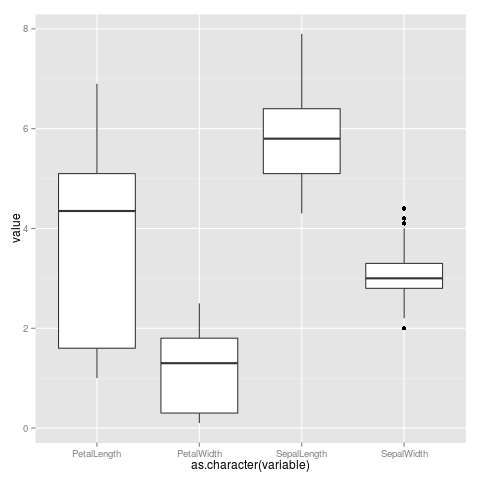

RCall.RObject{RCall.VecSxp}


In [27]:
R"""
library(ggplot2)
ggplot($long, aes(x=as.character(variable), y=value)) + geom_boxplot()
"""

[Gadfly](http://gadflyjl.org/) es una biblioteca similar a *ggplot2* pero para Julia.

In [28]:
using Gadfly

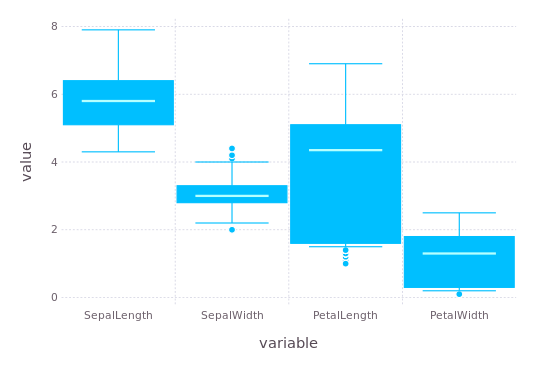

In [29]:
Gadfly.plot(long, x=:variable, y=:value, Geom.boxplot)

Mientras los *density plots* permiten observar una *PDF* inferida a partir de los datos, la función `ecdf` de la biblioteca [StatsBase](http://statsbasejl.readthedocs.io/en/latest/empirical.html) de Julia, 
permite observar la función de densidad de probabilidad acumulada empírica de una muestra ([**Empirical Cumulative Distribution Function**](https://en.wikipedia.org/wiki/Empirical_distribution_function) *ECDF*), una aproximación a la *CDF*.

In [36]:
using StatsBase

In [43]:
ECDF = ecdf(iris[:SepalLength]) # retorna una función

ef (generic function with 2 methods)

In [44]:
plot(ECDF, extrema(iris[:SepalLength])..., label="ECDF")

### Ajuste de distribuciones estadísticas

Es posible, para los datos de una muestra, ajustar una distribución de densidad de probabilidad ([*distribution fitting*](https://en.wikipedia.org/wiki/Distribution_fitting)). Muchos de los estadísticos determinados durante la exploración de datos pueden son los estimadores de [máxima verosimilitud](https://en.wikipedia.org/wiki/Maximum_likelihood) o *maximum-likelihood estimator (MLE)* de algunas distribuciones. Por ejemplo, la media es el estimador de máxima verosimilitud de la media poblacional $\mu$ de una distribución normal. Tanto los estadísticos cuantitativos, como el análisis gráfico realizado en al etapa de exploración (histogramas, *density plots*, *boxplots* y *ecdf*) pueden ayudar a decidir cuál familia de funciones de densidad de probabilidad debemos ajustar. La biblioteca [Distributions](http://distributionsjl.readthedocs.io/en/latest/fit.html) de Julia posee un método `fit` que permite estimar los parámetros de una distribución a partir de los datos, en general usando máxima verosimilitud. 

In [74]:
using Distributions

variable = iris[:SepalWidth]

mean(variable)

3.0573333333333332

In [75]:
std(variable) # std usa n-1

0.4358662849366982

In [76]:
ajuste = fit(Normal, variable) # std usa n

Distributions.Normal{Float64}(μ=3.0573333333333337, σ=0.4344109677354944)

In [77]:
histogram(variable, normed=true)
plot!(x -> pdf(ajuste,x))

### Tests de normalidad

Como parte del análisis inicial de datos, muchas veces debemos comprobar si los valores de una variable en nuestra muestra se distribuyen de manera normal. Existen diversas manera de [testear normalidad](https://en.wikipedia.org/wiki/Normality_test), las más populares son:

#### Gráfico de probabilidad normal

Los [gráficos QQ](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) (*qq plots* por *quantile*) permiten comparar los [cuantiles](https://en.wikipedia.org/wiki/Quantile) de dos distribuciones. Cuando en uno de los ejes se colocan los cuantiles de una distribución normal canónica, hablamos de un [gráfico de probabilidad normalidad](https://en.wikipedia.org/wiki/Normal_probability_plot). Si la distribución de los datos es aproximadamente normal, el gráfico de normalidad mostrará los puntos equivalente a los datos distribuidos sobre una línea. 

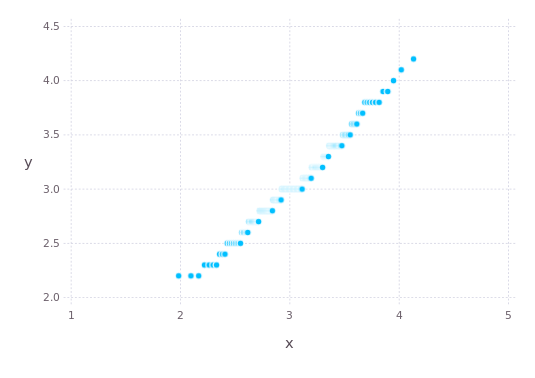

In [87]:
# Gadfly.plot(x=Normal(), y=zscore(variable), Stat.qq, Geom.point)
Gadfly.plot(x=ajuste, y=variable, Stat.qq, Geom.point)

#### Test de hipótesis

http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm
http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm

In [84]:
using HypothesisTests

In [101]:
R"""
library(ADGofTest)
ad.test($(zscore(variable)), pnorm)
"""

RCall.RObject{RCall.VecSxp}

	Anderson-Darling GoF Test

data:  ##RCall##19068  and  pnorm
AD = 0.90796, p-value = 0.4092
alternative hypothesis: NA



In [106]:
OneSampleADTest(zscore(variable), Normal())

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.02022651362259733 (significant)

Details:
    number of observations:   150
    sample mean:              3.019806626980426e-16
    sample SD:                1.0
    A² statistic:             0.9079550471145649


In [90]:
R"shapiro.test($variable)"

RCall.RObject{RCall.VecSxp}

	Shapiro-Wilk normality test

data:  ##RCall##19030
W = 0.98492, p-value = 0.1012



### Teorización *Post Hoc*

Se denomina [teorización *post hoc*](https://en.wikipedia.org/wiki/Testing_hypotheses_suggested_by_the_data) a la generación de hipótesis sugeridas por el conjunto de datos observado, sin testear esta hipótesis en nuevos datos. Hacerlo puede resultar en aceptar hipótesis incorrectas, que sólo son válidas en el presente conjunto de datos, dado que es más probable aceptar una hipótesis testeada en el conjunto de datos en el cual se genero.  
Es necesario testear estas nuevas hipotesis en una nueva muestra de la población. Sin embargo, en muchas casos eso puede ser imposible, por ejemplo al analizar un fenómeno natural finito. Este problema de disponer de un conjunto limitado de datos, haciendo difícil o imposible la recolección de nuevos datos para la fase de confirmación fue denominado por John Tukey como [*uncomfortable science*](https://en.wikipedia.org/wiki/Uncomfortable_science).  
Un caso no tan obvio de *uncomfortable science* o de teorización *post hoc* puede surgir bioinformática cuando se toman todos los elementos disponibles de una base de datos para hacer los análisis exploratorios sin dejar datos suficientes para testear las hipótesis que surgen de ese análisis.
Otro proceso que puede generar este tipo de problemas es el conocido como [*data fishing*](https://en.wikipedia.org/wiki/Data_dredging), el cual consiste en ir testeando hipótesis sobre un conjunto de datos hasta encontrar una un valor estadísticamente significativo en algún test de hipótesis. El término *data fishing* posee una connotación negativa, dado que representa el comportamiento **poco ético** de buscar, seleccionar e informar sólo los resultados positivos sin el debido control, muchas veces como si las hipótesis hubiera sido anterior al análisis *(Leung 2011)*.  
Buscar patrones en los datos, muchas veces aplicando test estadísticos, no es incorrecto. Lo incorrecto es utilizar el mismo conjunto de datos (*in-sample data*) para soportar esa hipótesis. Las alternativas posibles para no caer en este problema son:  
- Recolectar nuevos datos (*out-of-sample data*), realizar un nuevo experimento, para testear la nueva hipótesis.  
- Si no es posible recolectar nuevos datos, es posible separar el conjunto de datos de manera aleatoria en dos grupos. Uno puede ser usado para plantear nuevas hipótesis, que luego serán testeadas en el otro conjunto.  
- Dado que la teorización *post hoc* y los casos de *uncomfortable science* pueden terminar en [sobreajuste](https://en.wikipedia.org/wiki/Overfitting) (*overfitting*), los métodos de <a href=”https://en.wikipedia.org/wiki/Cross-validation_(statistics)”>validación cruzada</a> (*cross validation*) pueden resultar útiles para evitarlo.  
- Aplicar correcciones por [testeo múltiple](https://en.wikipedia.org/wiki/Multiple_comparisons_problem), considerando todas las hipótesis testeadas (por ejemplo, todas las hipótesis testeadas durante el proceso de *data fishing*).  

*Leung, Kwok. "Presenting post hoc hypotheses as a priori: Ethical and theoretical issues." Management and Organization Review 7.3 (2011): 471-479.*
